In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [49]:
# Load the Boston housing dataset
data = pd.read_csv(r"dataset\BostonHousing.csv")

In [50]:
plt.style.use("ggplot")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [51]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [53]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

CRIM: Per capita crime rate by town.

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.

INDUS: Proportion of non-retail business acres per town.

CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).

NOX: Nitric oxides concentration (parts per 10 million).

RM: Average number of rooms per dwelling.

AGE: Proportion of owner-occupied units built prior to 1940.

DIS: Weighted distances to five Boston employment centers.

RAD: Index of accessibility to radial highways.

TAX: Full-value property tax rate per $10,000.

PTRATIO: Pupil-teacher ratio by town.

B: is the proportion of Black residents by town.

LSTAT: Percentage of lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s (target variable)

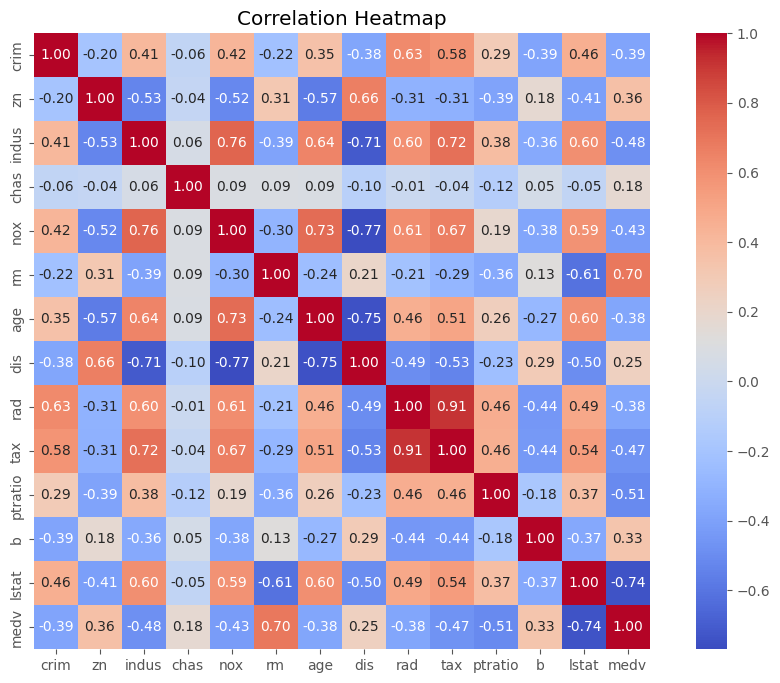

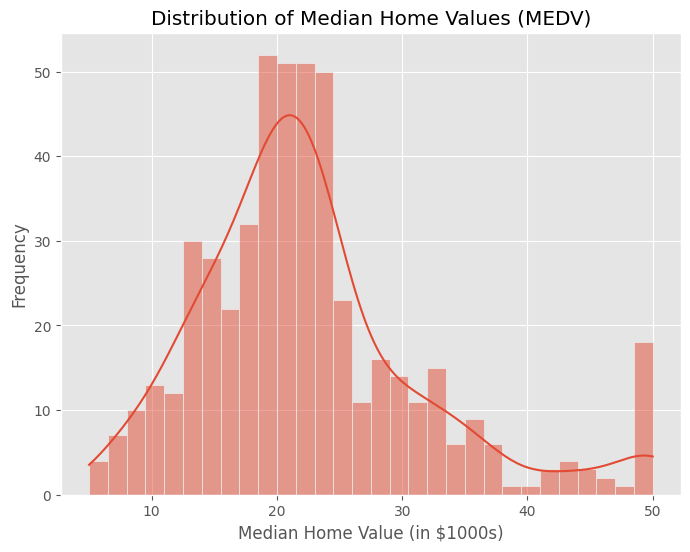

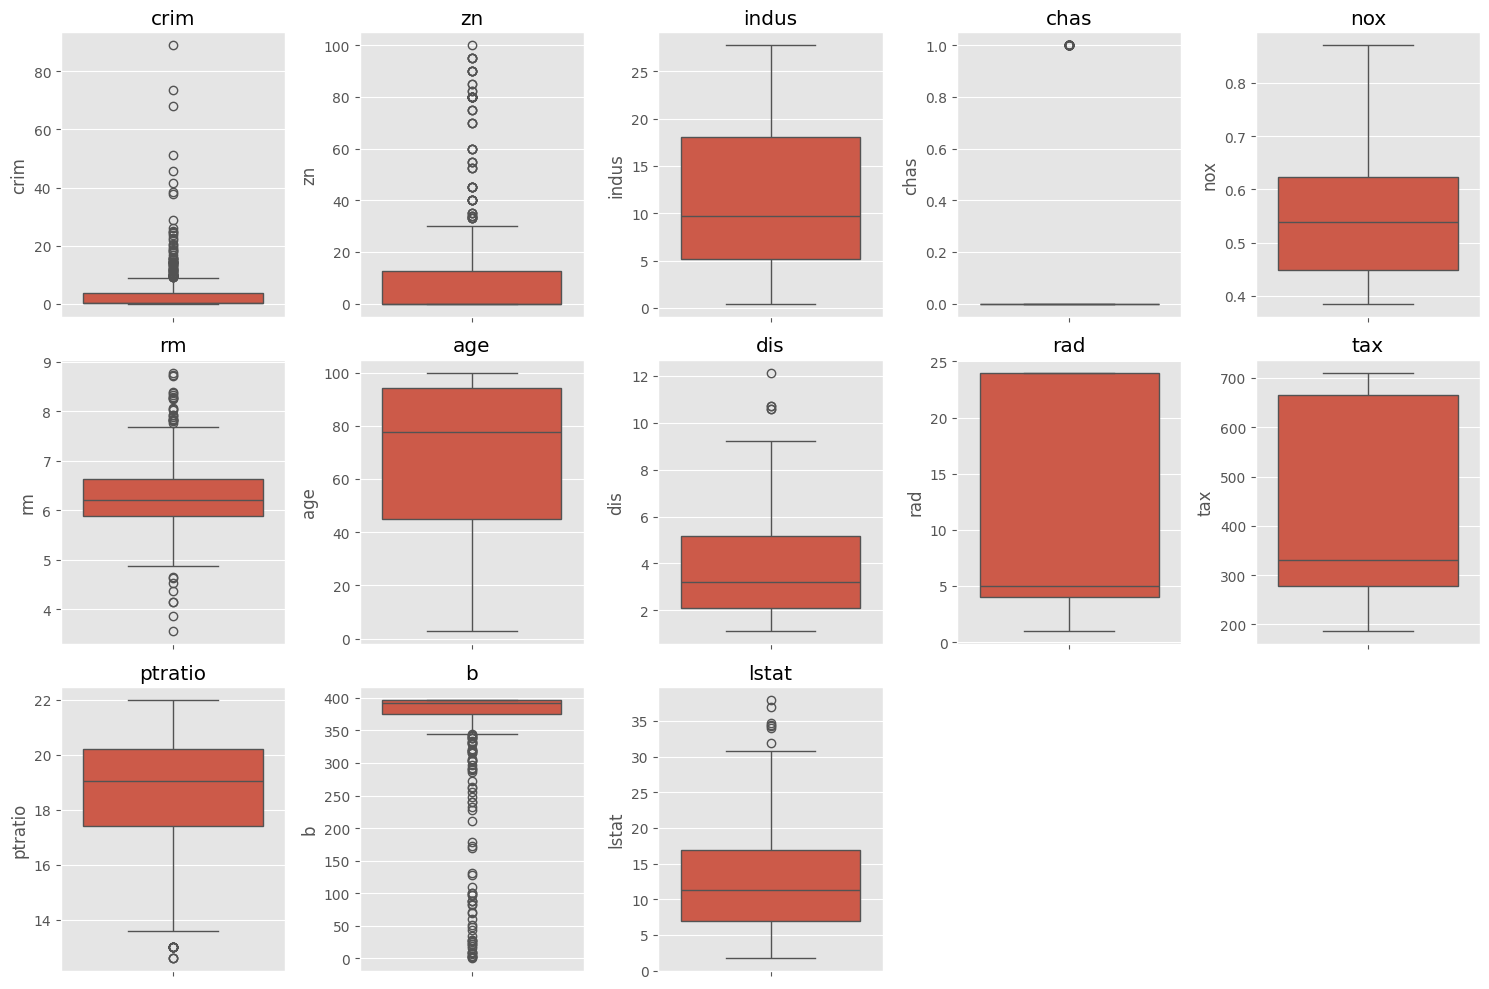

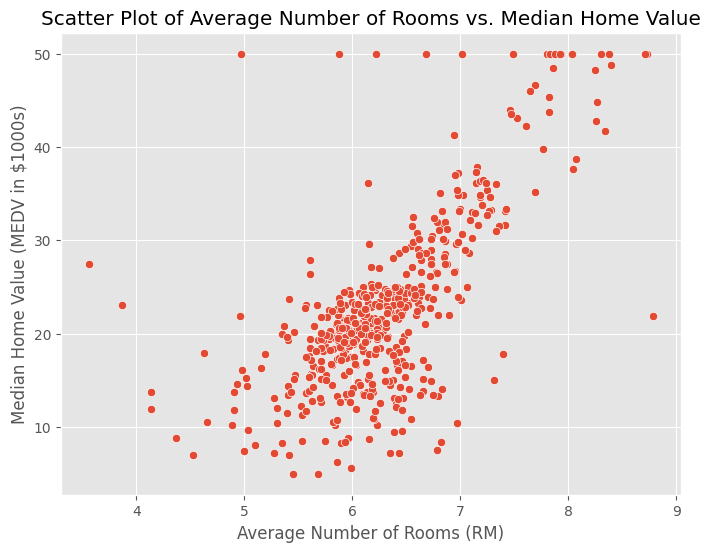

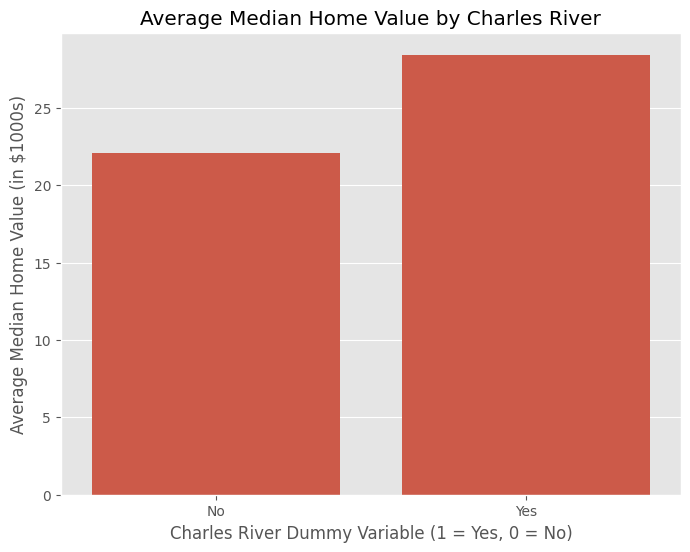

In [54]:
boston_data = data

plt.figure(figsize=(12, 8))
correlation = boston_data.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(boston_data['medv'], bins=30, kde=True)
plt.title("Distribution of Median Home Values (MEDV)")
plt.xlabel("Median Home Value (in $1000s)")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(15, 10))
for i, col in enumerate(boston_data.columns[:-1], 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=boston_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(data=boston_data, x='rm', y='medv')
plt.title("Scatter Plot of Average Number of Rooms vs. Median Home Value")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median Home Value (MEDV in $1000s)")
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(data=boston_data, x='chas', y='medv',errorbar=None)
plt.title("Average Median Home Value by Charles River")
plt.xlabel("Charles River Dummy Variable (1 = Yes, 0 = No)")
plt.ylabel("Average Median Home Value (in $1000s)")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In [55]:

X = data.drop("medv", axis=1)
y = data["medv"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linear_regression = LinearRegression()
lasso_regression = Lasso()
ridge_regression = Ridge()
decision_tree = DecisionTreeRegressor()

In [57]:

param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100]
}
param_grid_decision_tree = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [58]:
decision_tree_grid = GridSearchCV(decision_tree, param_grid_decision_tree, cv=5)

lasso_grid_search = GridSearchCV(lasso_regression, param_grid, cv=5)
ridge_grid_search = GridSearchCV(ridge_regression, param_grid, cv=5)

In [59]:

linear_regression.fit(X_train_scaled, y_train)
lasso_grid_search.fit(X_train_scaled, y_train)
ridge_grid_search.fit(X_train_scaled, y_train)
decision_tree_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [60]:
y_pred_linear_train = linear_regression.predict(X_train_scaled)
y_pred_lasso_train = lasso_grid_search.best_estimator_.predict(X_train_scaled)
y_pred_ridge_train = ridge_grid_search.best_estimator_.predict(X_train_scaled)
y_pred_tree_train = decision_tree_grid.best_estimator_.predict(X_train_scaled)


In [61]:
y_pred_linear_test = linear_regression.predict(X_test_scaled)
y_pred_lasso_test = lasso_grid_search.best_estimator_.predict(X_test_scaled)
y_pred_ridge_test = ridge_grid_search.best_estimator_.predict(X_test_scaled)
y_pred_tree_test = decision_tree_grid.best_estimator_.predict(X_test_scaled)

In [62]:
train_mse_linear = mean_squared_error(y_train, y_pred_linear_train)
test_mse_linear = mean_squared_error(y_test, y_pred_linear_test)
train_r2_linear = r2_score(y_train, y_pred_linear_train)
test_r2_linear = r2_score(y_test, y_pred_linear_test)

In [63]:

train_mse_lasso = mean_squared_error(y_train, y_pred_lasso_train)
test_mse_lasso = mean_squared_error(y_test, y_pred_lasso_test)
train_r2_lasso = r2_score(y_train, y_pred_lasso_train)
test_r2_lasso = r2_score(y_test, y_pred_lasso_test)

In [64]:
# Ridge Regression
train_mse_ridge = mean_squared_error(y_train, y_pred_ridge_train)
test_mse_ridge = mean_squared_error(y_test, y_pred_ridge_test)
train_r2_ridge = r2_score(y_train, y_pred_ridge_train)
test_r2_ridge = r2_score(y_test, y_pred_ridge_test)


# Decision Tree Regression
train_mse_tree = mean_squared_error(y_train, y_pred_tree_train)
test_mse_tree = mean_squared_error(y_test, y_pred_tree_test)
train_r2_tree = r2_score(y_train, y_pred_tree_train)
test_r2_tree = r2_score(y_test, y_pred_tree_test)

In [65]:
print("Linear Regression:")
print(f"Training MAE: {train_mse_linear:.4f}, Testing MAE: {test_mse_linear:.4f}")
print(f"Training R^2: {train_r2_linear:.4f}, Testing R^2: {test_r2_linear:.4f}")

print("\nLasso Regression:")
print(f"Best Alpha: {lasso_grid_search.best_params_['alpha']}")
print(f"Training MAE: {train_mse_lasso:.4f}, Testing MAE: {test_mse_lasso:.4f}")
print(f"Training R^2: {train_r2_lasso:.4f}, Testing R^2: {test_r2_lasso:.4f}")

print("\nRidge Regression:")
print(f"Best Alpha: {ridge_grid_search.best_params_['alpha']}")
print(f"Training MAE: {train_mse_ridge:.4f}, Testing MAE: {test_mse_ridge:.4f}")
print(f"Training R^2: {train_r2_ridge:.4f}, Testing R^2: {test_r2_ridge:.4f}")

print("\nDecision Tree Regression:")
print(f"Best Parameters: {decision_tree_grid.best_params_}")
print(f"Training MAE: {train_mse_tree:.4f}, Testing MAE: {test_mse_tree:.4f}")
print(f"Training R^2: {train_r2_tree:.4f}, Testing R^2: {test_r2_tree:.4f}")

Linear Regression:
Training MAE: 22.5346, Testing MAE: 20.7707
Training R^2: 0.7296, Testing R^2: 0.7657

Lasso Regression:
Best Alpha: 0.01
Training MAE: 22.5396, Testing MAE: 20.8023
Training R^2: 0.7295, Testing R^2: 0.7654

Ridge Regression:
Best Alpha: 10
Training MAE: 22.6305, Testing MAE: 21.0327
Training R^2: 0.7284, Testing R^2: 0.7628

Decision Tree Regression:
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Training MAE: 6.0847, Testing MAE: 19.7234
Training R^2: 0.9270, Testing R^2: 0.7776
